In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [4]:
# Load the dataset
data = pd.read_csv("insurance.csv")  # Replace with the actual dataset path

# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset
print(data.info())

# Check for missing values
missing_data = data.isnull().sum()
print("Missing values per column:\n", missing_data)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker 

In [5]:
# Summary statistics
print(data.describe(include="all"))


                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

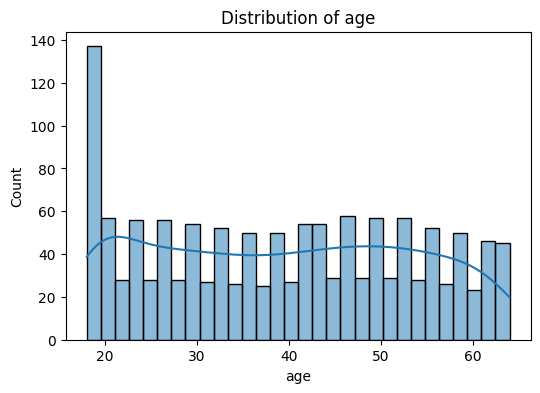

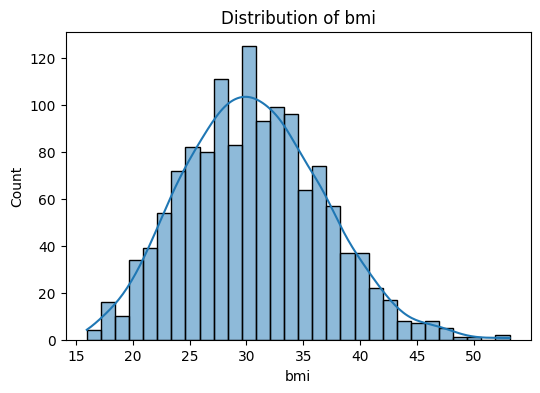

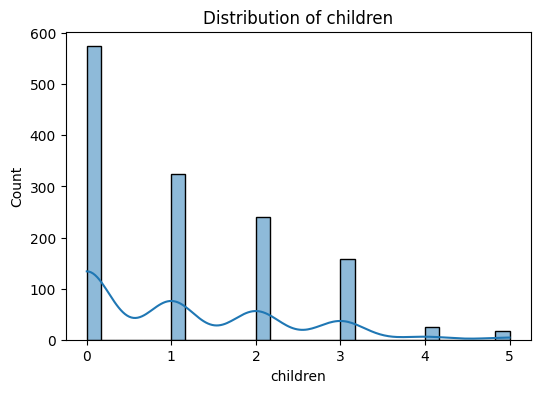

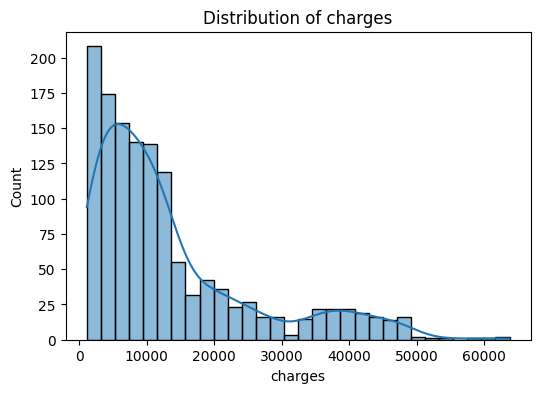

In [6]:
# Visualize distributions of numeric variables
numeric_columns = ['age', 'bmi', 'children', 'charges']
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()



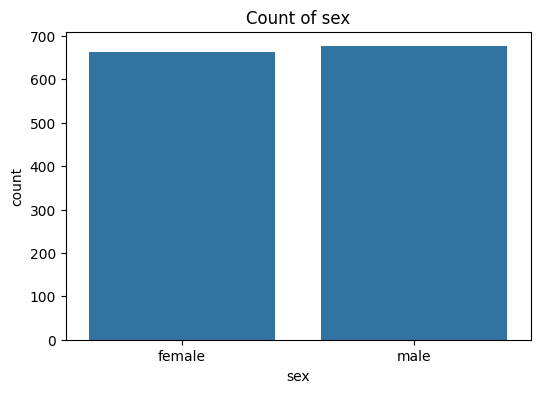

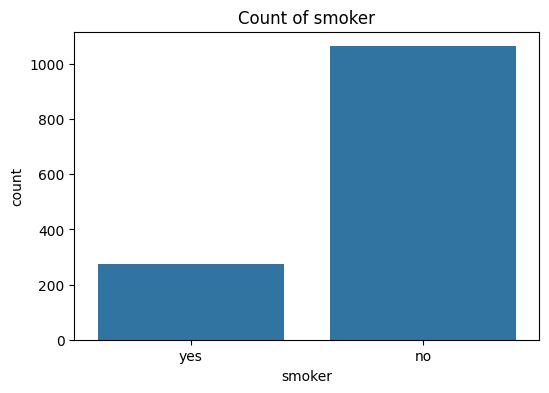

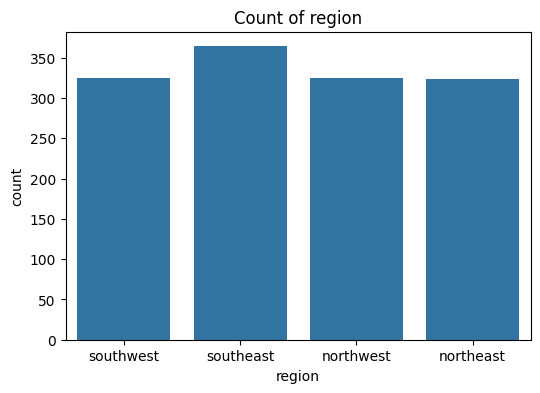

In [7]:
# Visualize categorical variables
categorical_columns = ['sex', 'smoker', 'region']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column)
    plt.title(f"Count of {column}")
    plt.show()


age: Min = 18, Max = 64
bmi: Min = 15.96, Max = 53.13
children: Min = 0, Max = 5
charges: Min = 1121.8739, Max = 63770.42801


<Figure size 800x600 with 0 Axes>

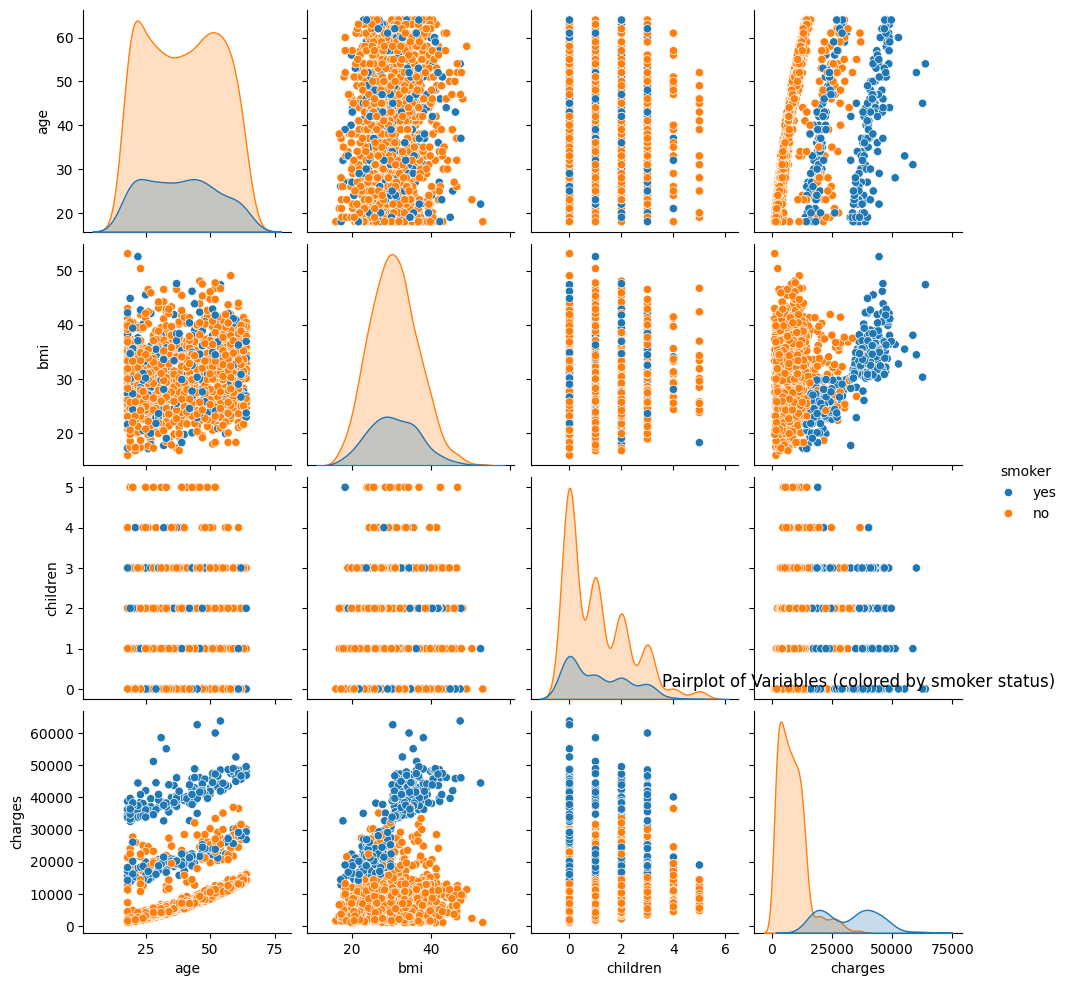

In [14]:
# Display the range of numeric variables
for column in numeric_columns:
    print(f"{column}: Min = {data[column].min()}, Max = {data[column].max()}")

# Explore relationships between variables
plt.figure(figsize=(8, 6))
sns.pairplot(data, hue='smoker', diag_kind='kde')
plt.title("Pairplot of Variables (colored by smoker status)")
plt.show()

In [11]:
# Central Tendency and Dispersion
for column in numeric_columns:
    mean = data[column].mean()
    median = data[column].median()
    variance = data[column].var()
    std_dev = data[column].std()
    print(f"{column} - Mean: {mean}, Median: {median}, Variance: {variance}, Std Dev: {std_dev}")


age - Mean: 39.20702541106129, Median: 39.0, Variance: 197.40138665754424, Std Dev: 14.049960379216172
bmi - Mean: 30.66339686098655, Median: 30.4, Variance: 37.187883609773266, Std Dev: 6.098186911679017
children - Mean: 1.0949177877429, Median: 1.0, Variance: 1.4532127456668944, Std Dev: 1.2054927397819095
charges - Mean: 13270.422265141257, Median: 9382.033, Variance: 146652372.1528548, Std Dev: 12110.011236693994


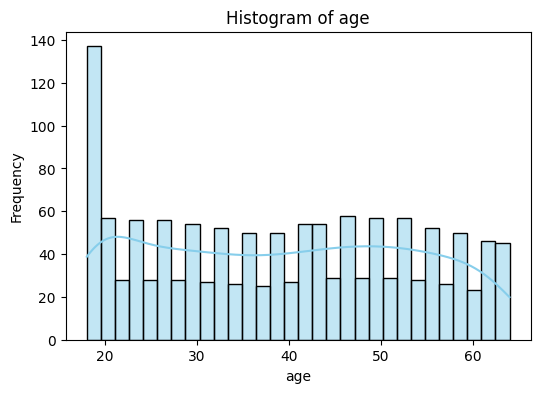

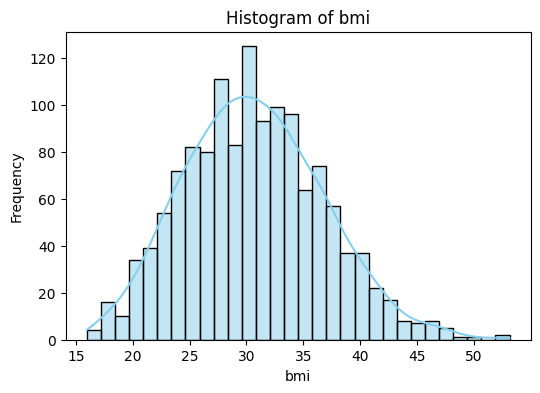

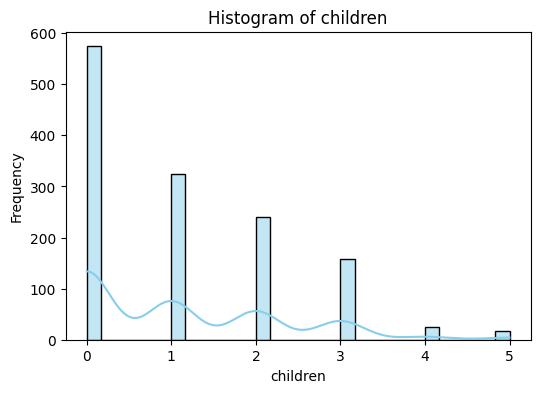

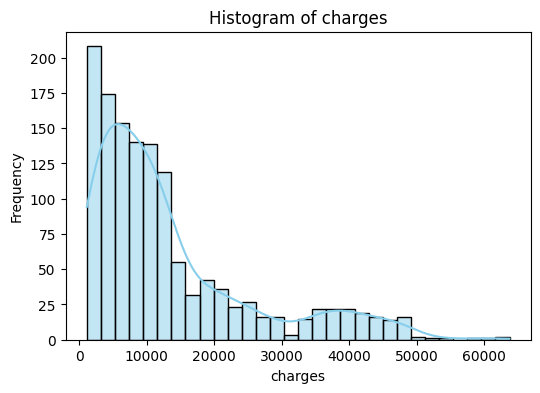

In [15]:
# Histogram for numerical variables
numeric_columns = ['age', 'bmi', 'children', 'charges']
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

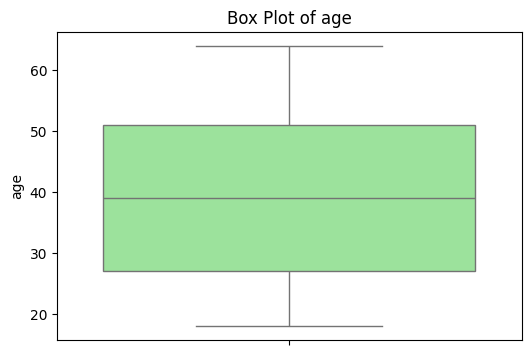

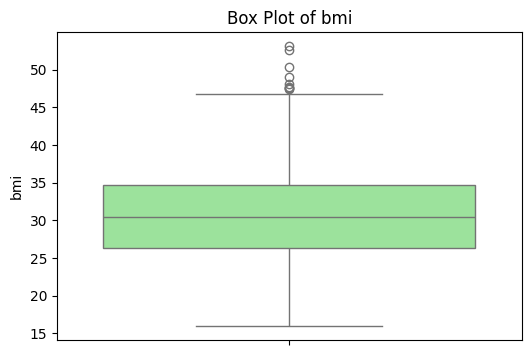

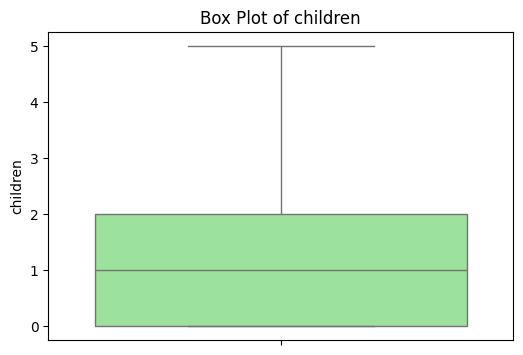

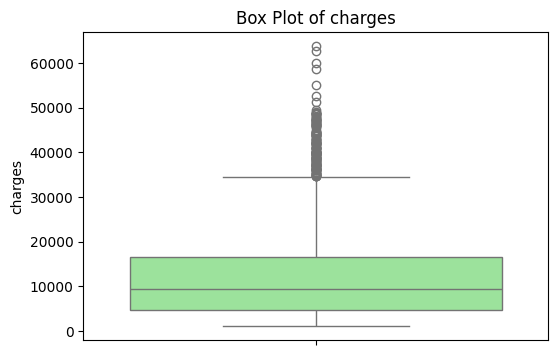

In [23]:
# Box plots for numerical variables to detect outliers
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, y=column, color="lightgreen")
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()


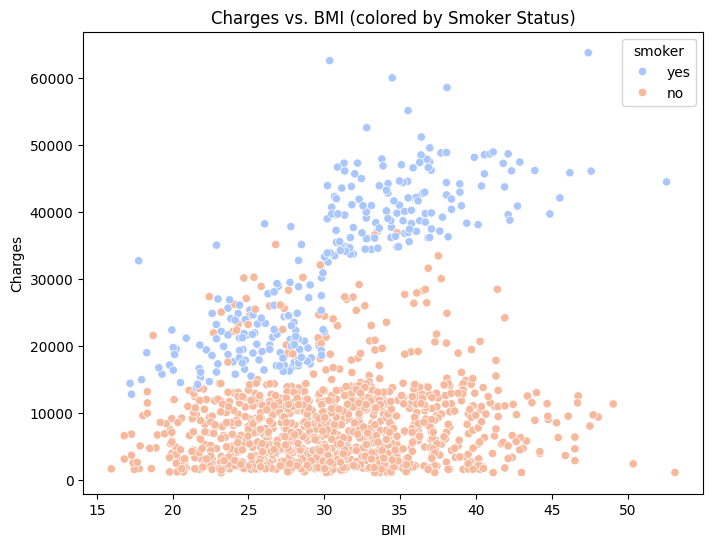

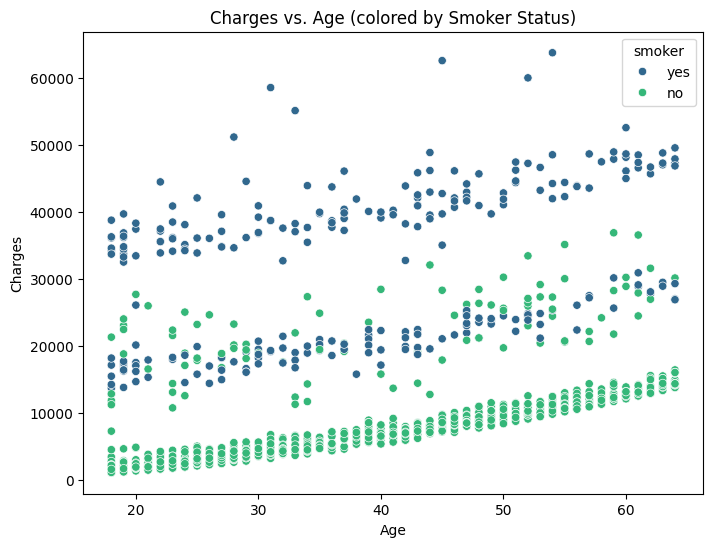

In [24]:
# Scatter plot for charges vs. BMI, colored by smoker status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', palette='coolwarm')
plt.title("Charges vs. BMI (colored by Smoker Status)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Scatter plot for age vs. charges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', palette='viridis')
plt.title("Charges vs. Age (colored by Smoker Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


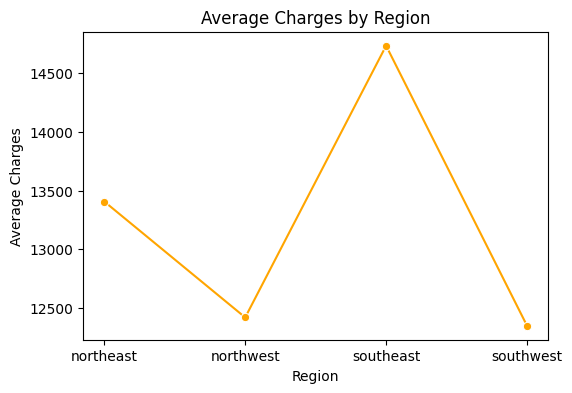

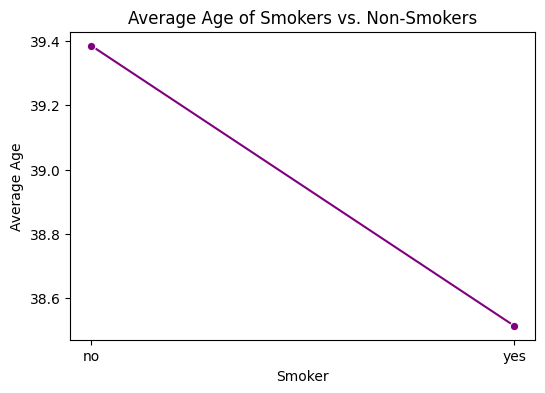

In [25]:
# Line plot for average charges across regions
region_charges = data.groupby('region')['charges'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(data=region_charges, x='region', y='charges', marker="o", color="orange")
plt.title("Average Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.show()

# Line plot for average age of smokers and non-smokers
smoker_age = data.groupby('smoker')['age'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(data=smoker_age, x='smoker', y='age', marker="o", color="purple")
plt.title("Average Age of Smokers vs. Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Average Age")
plt.show()


In [31]:
from sklearn.model_selection import train_test_split

# Encoding categorical variables (Sex, Smoker, Region)
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Splitting data into features (X) and target (y)
X = data_encoded.drop(columns=['charges'])  # Features
y = data_encoded['charges']  # Target variable

# Splitting into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing dataset shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (1070, 8), Testing set: (268, 8)


In [32]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Random Forest with Grid Search
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

# Support Vector Regressor with Grid Search
svr = SVR()
svr_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svr_grid = GridSearchCV(svr, svr_params, cv=5, scoring='r2')
svr_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='r2')

In [33]:
# Evaluate each model on the test set
models = {
    'Linear Regression': lin_reg,
    'Random Forest': rf_grid.best_estimator_,
    'SVR': svr_grid.best_estimator_
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display metrics
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R² Score: {r2:.2f}")
    print("-" * 50)


Evaluating Linear Regression...
MAE: 4181.19, MSE: 33596915.85, R² Score: 0.78
--------------------------------------------------
Evaluating Random Forest...
MAE: 2518.49, MSE: 20691950.72, R² Score: 0.87
--------------------------------------------------
Evaluating SVR...
MAE: 6025.52, MSE: 147294741.01, R² Score: 0.05
--------------------------------------------------
